In [1]:
from settings import *

In [2]:
kospi = fdr.DataReader('KS11')[['Close']]

In [3]:
kospi['peak52'] = kospi.rolling(252, min_periods=1).max()
kospi['drawdown52'] = kospi['Close']/kospi['peak52'] - 1.0
kospi['max_dd52'] = kospi['drawdown52'].rolling(window=252, min_periods=1).min()


In [4]:
kospi.tail()

,Close,peak52,drawdown52,max_dd52
Date,,,,
2022-01-24,2792.000,3305.210,-0.155,-0.155
2022-01-25,2720.390,3305.210,-0.177,-0.177
2022-01-26,2709.240,3305.210,-0.180,-0.180
2022-01-27,2614.490,3305.210,-0.209,-0.209
2022-01-28,2663.340,3305.210,-0.194,-0.209


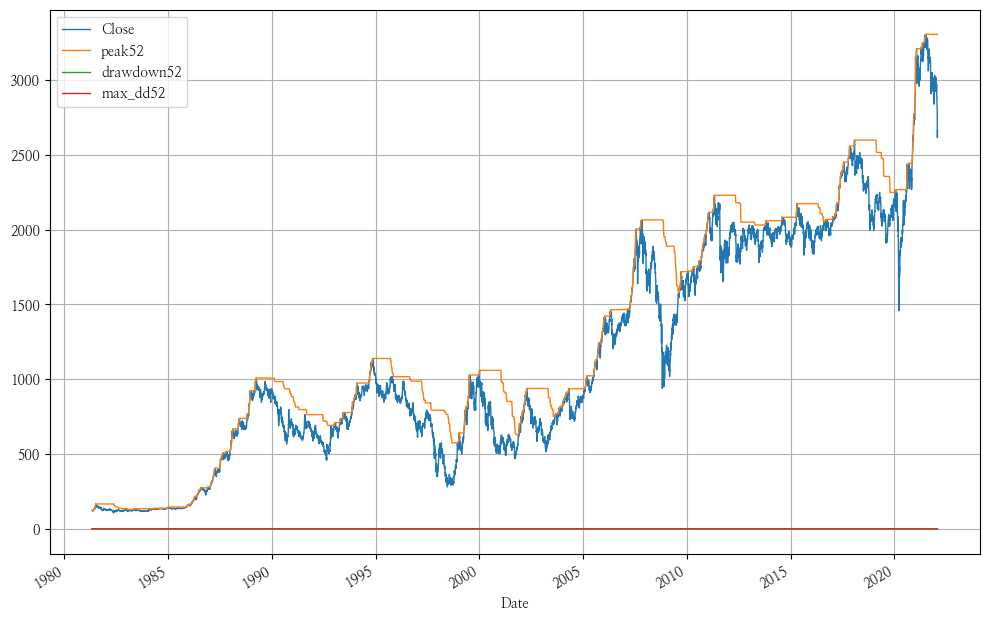

In [5]:
kospi.plot(logy=False);

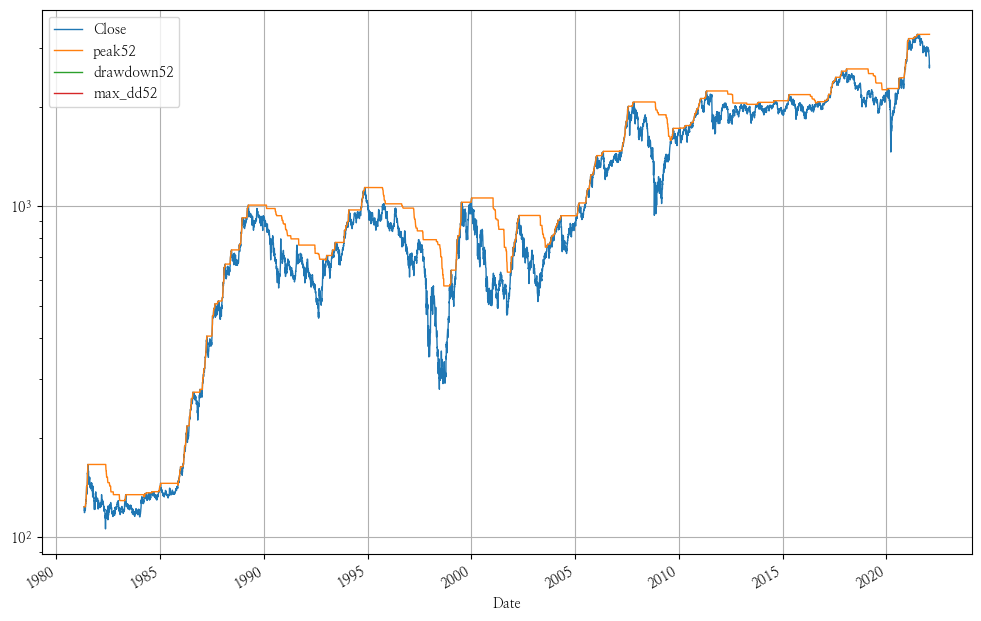

In [6]:
kospi.plot(logy=True);

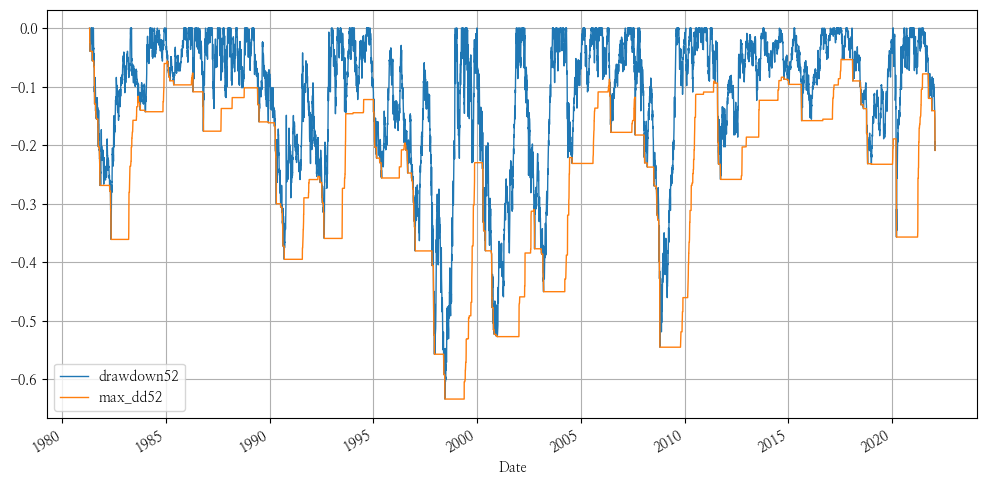

In [7]:
kospi[['drawdown52', 'max_dd52']].plot(figsize=(12, 6));

In [8]:
kospi.tail()

,Close,peak52,drawdown52,max_dd52
Date,,,,
2022-01-24,2792.000,3305.210,-0.155,-0.155
2022-01-25,2720.390,3305.210,-0.177,-0.177
2022-01-26,2709.240,3305.210,-0.180,-0.180
2022-01-27,2614.490,3305.210,-0.209,-0.209
2022-01-28,2663.340,3305.210,-0.194,-0.209


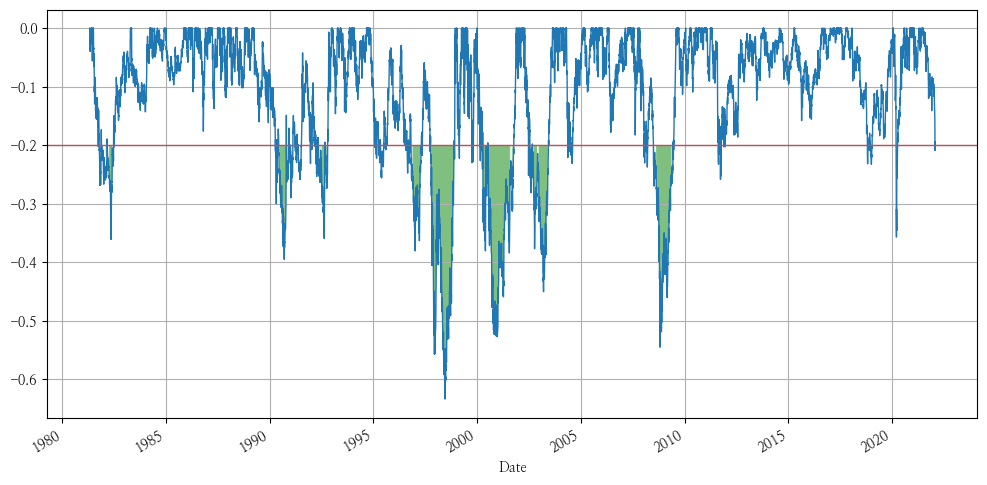

In [9]:
ax1 = kospi['drawdown52'].plot(figsize=(12,6));
ax1.axhline(y=-0.2, color='r', lw=1);
ax1.fill_between(kospi.index, kospi['drawdown52'], -0.2, where=kospi['drawdown52'] < -0.25, facecolor='green', alpha=0.5);

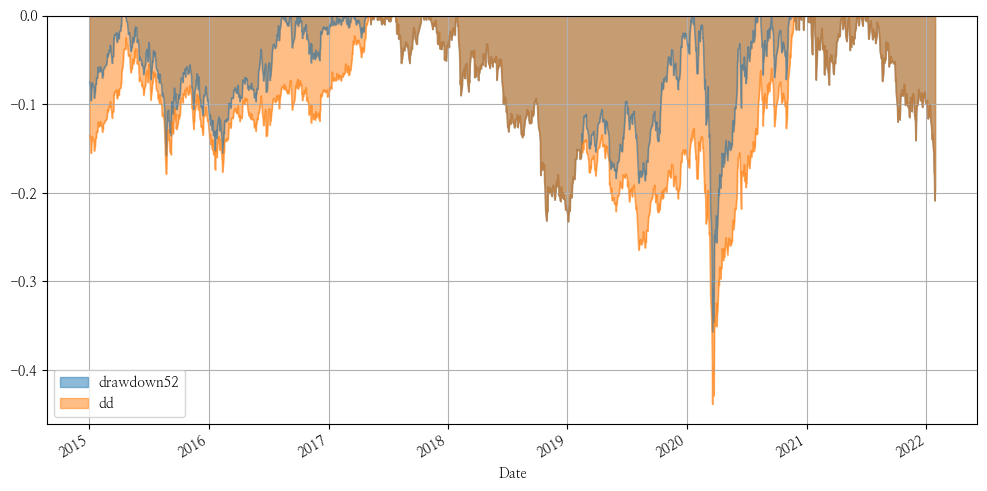

In [10]:
kospi['dd'] = kospi['Close'].to_drawdown_series()
kospi.loc['2015':, ['drawdown52', 'dd']].plot.area(stacked=False, alpha=0.5, figsize=(12,6));